# Hierarchical clustering

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## Preparando datos de prueba

In [2]:
X,y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2,return_centers=True)

df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y,
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1],
    }
)

## Visualización de datos

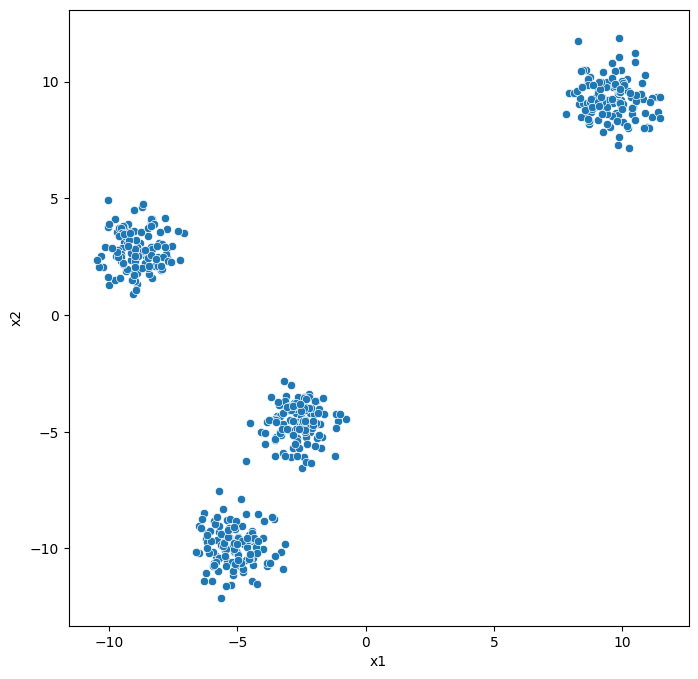

In [3]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1',y='x2')
plt.show()

## Dendrograma y hierarchical clustering

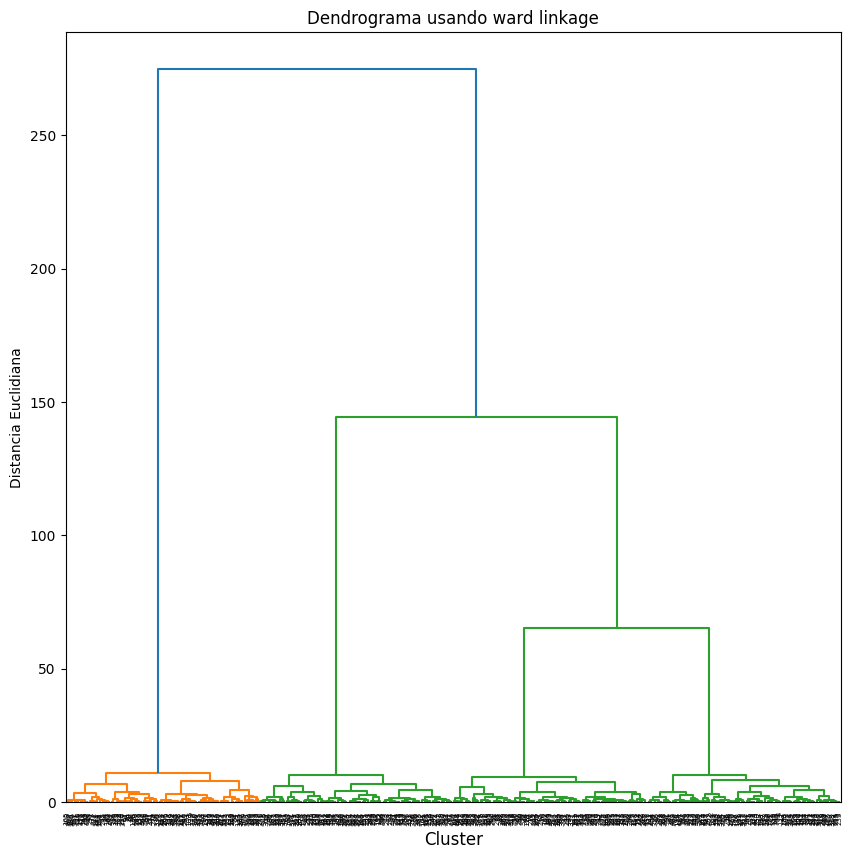

In [19]:
from tools_ml.eval_hierarchical import  dendrogram_visualization

dendrogram_visualization(X, 'ward')

In [7]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [8]:
df_blobs['cluster'] = y_hc

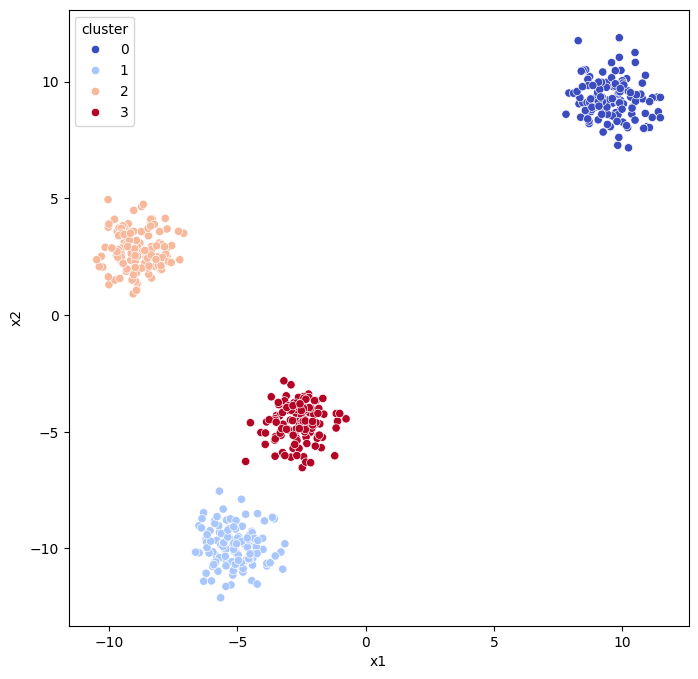

In [9]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1',y='x2', hue='cluster', palette='coolwarm')
plt.show()

## Evaluación de hierarchical clustering

In [10]:
silhouette_score(X,y_hc)

0.825856779223006

In [18]:
help(silhouette_contraste)

Help on function silhouette_contraste in module tools_ml.eval_hierarchical:

silhouette_contraste(X, agglom_model: sklearn.cluster._agglomerative.AgglomerativeClustering, range_n_clusters: list[int])
    Muestra los coeficientes de silueta de acuerdo a la cantidad de clusters especificados para el algoritmo ingresado
    Parameters:
    X: data para el entrenamiento
    agglom_model: Modelo jerarquico aglomerativo (debe tener todos los hiperparametros ya especificados a excepcion del 'n_clusters')
    range_n_clusters: Rango de clusters sobre los cuales se desea ver el performance del coeficiente de silueta

    Return:
    Silhouett_score para cada modelo con n clusters
    Grafica de silhouette de cada modelo con n clusters



For n_clusters = 2 The average silhouette_score is : 0.7307376250248311
For n_clusters = 3 The average silhouette_score is : 0.7871815051658071
For n_clusters = 4 The average silhouette_score is : 0.825856779223006
For n_clusters = 5 The average silhouette_score is : 0.6757104940044372
For n_clusters = 6 The average silhouette_score is : 0.5451018887259337


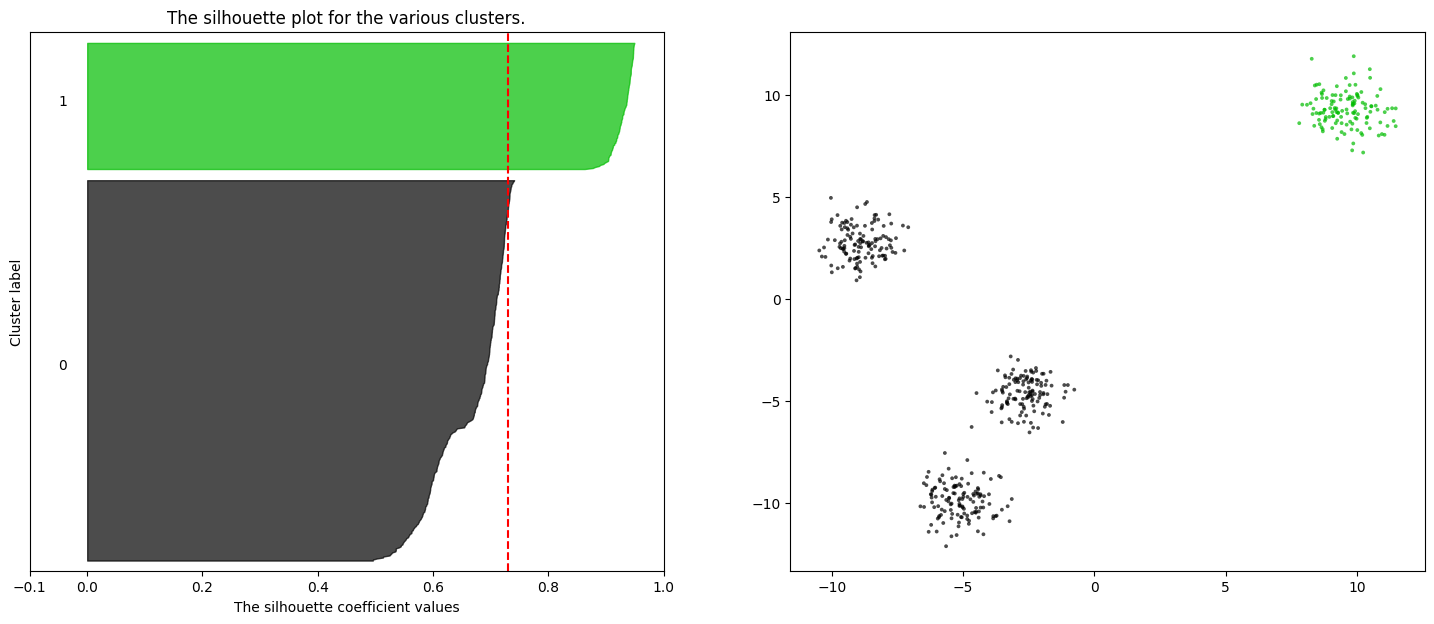

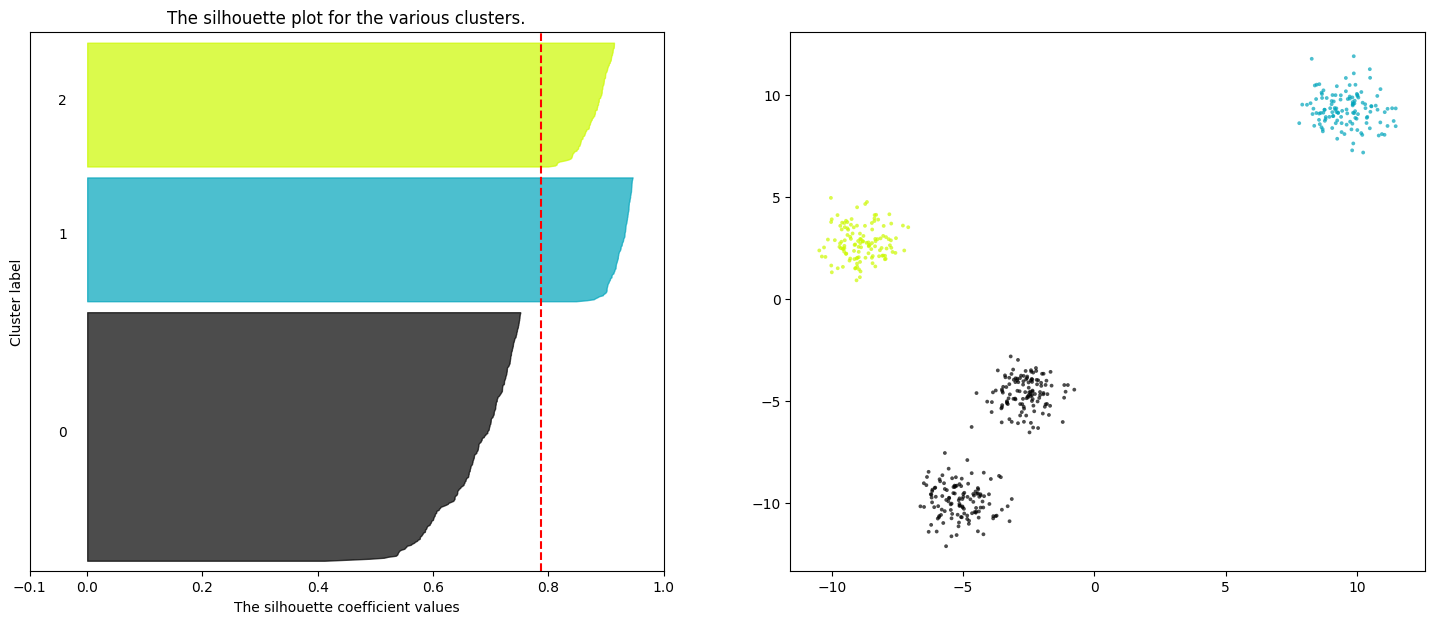

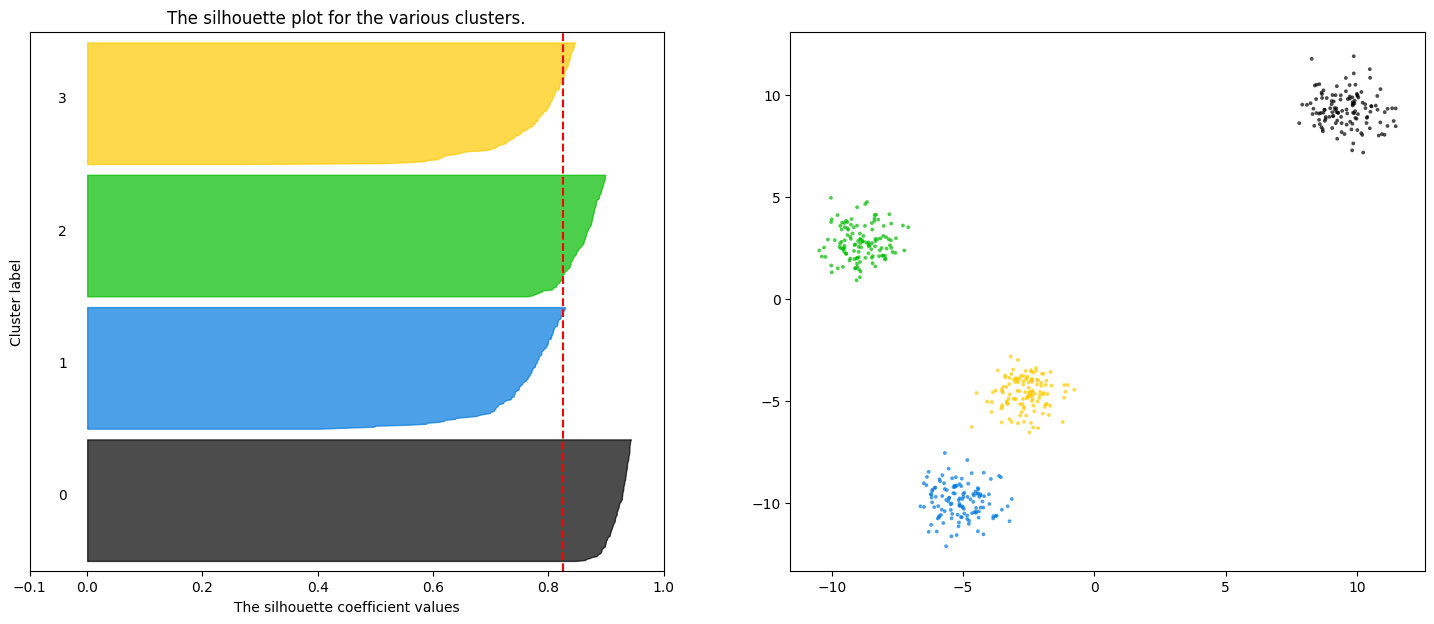

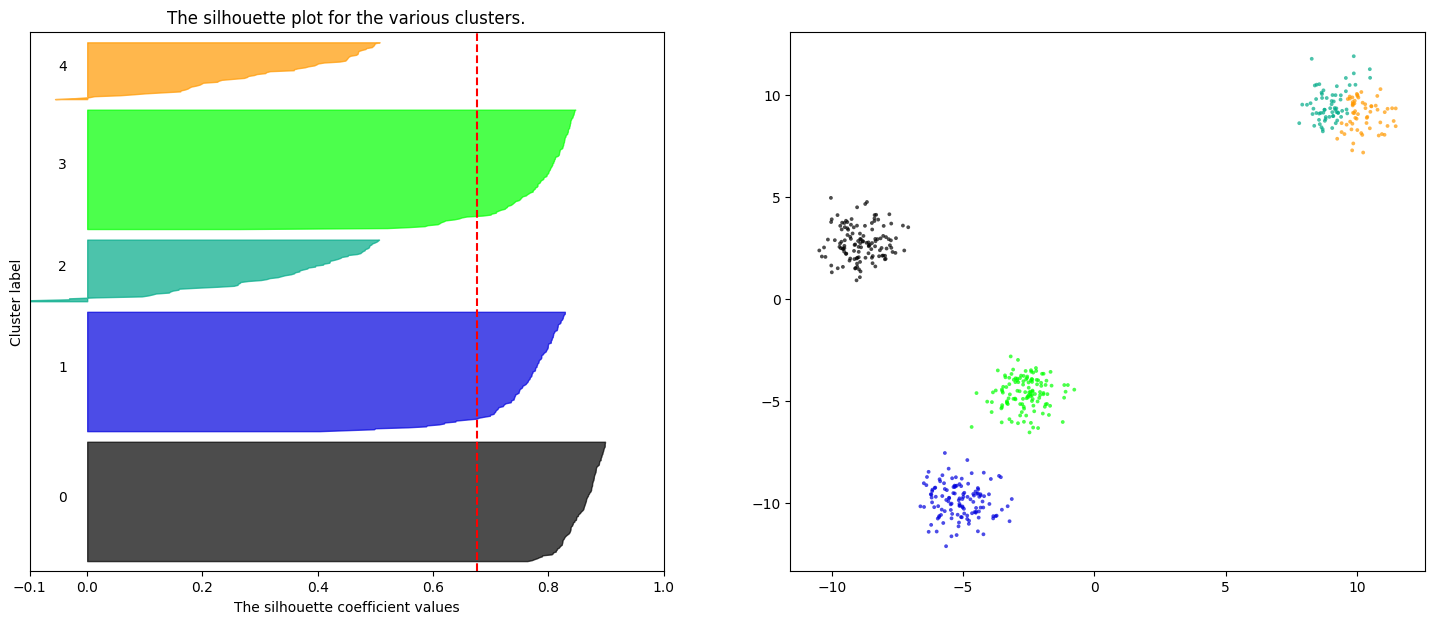

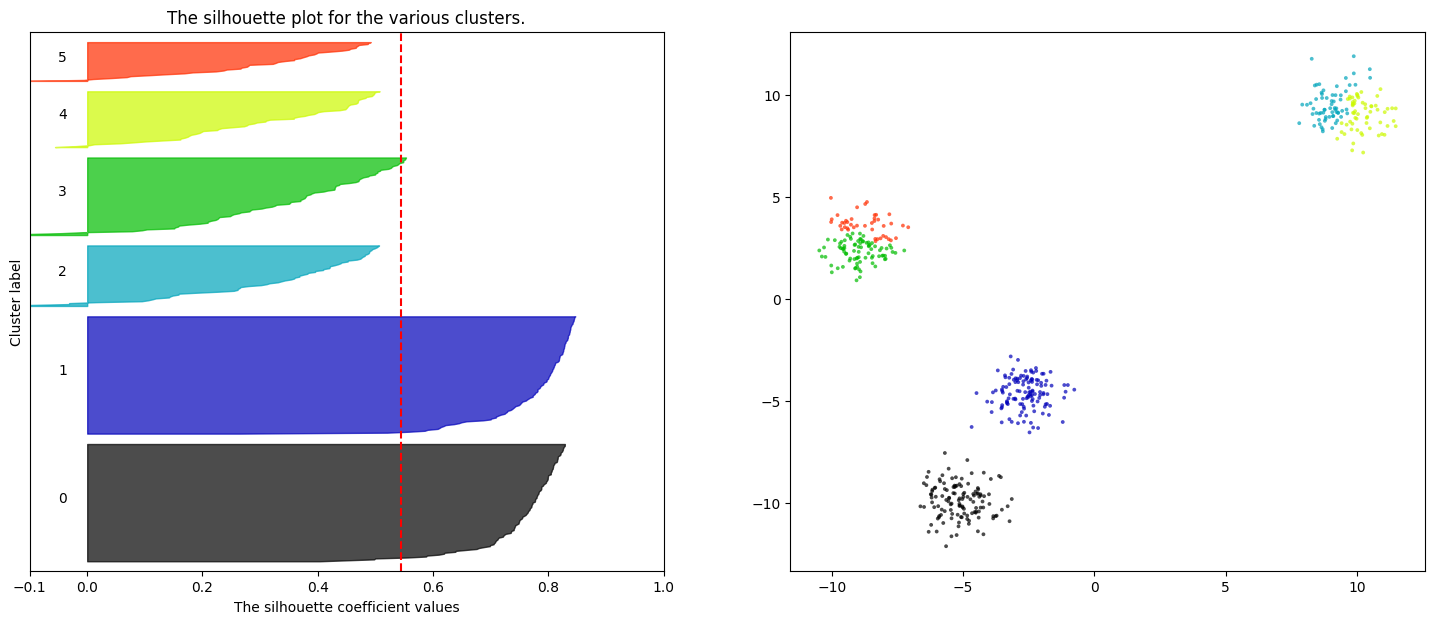

In [17]:
agglo_model = AgglomerativeClustering(metric='euclidean', linkage='ward')
from tools_ml.eval_hierarchical import silhouette_contraste
silhouette_contraste(X, agglo_model,[2,3,4,5,6 ])